In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

In [3]:
model = load_model('model.h5')

2022-01-24 19:45:41.202684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-24 19:45:41.203413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [6]:
y_pred = model.predict(x_test)

In [7]:
best_thresh = 0.8
best_accuracy = 0
best_y_pred = None

for i in np.arange(0.8, 1, 0.01):
    print(f'Calculating thresh: {i}')
    y_pred_ = (y_pred > i)
    score = accuracy_score(y_test, y_pred_)
    print(f'Accuracy: {score}')
    if score > best_accuracy:
        best_accuracy = score
        best_thresh = i
        best_y_pred = y_pred_

print(best_thresh)
print(best_accuracy)

Calculating thresh: 0.8
Accuracy: 0.6414185639229422
Calculating thresh: 0.81
Accuracy: 0.6519264448336253
Calculating thresh: 0.8200000000000001
Accuracy: 0.6567425569176882
Calculating thresh: 0.8300000000000001
Accuracy: 0.6654991243432574
Calculating thresh: 0.8400000000000001
Accuracy: 0.6738178633975481
Calculating thresh: 0.8500000000000001
Accuracy: 0.681260945709282
Calculating thresh: 0.8600000000000001
Accuracy: 0.6887040280210157
Calculating thresh: 0.8700000000000001
Accuracy: 0.7005253940455342
Calculating thresh: 0.8800000000000001
Accuracy: 0.7132224168126094
Calculating thresh: 0.8900000000000001
Accuracy: 0.7298598949211909
Calculating thresh: 0.9000000000000001
Accuracy: 0.7408056042031523
Calculating thresh: 0.9100000000000001
Accuracy: 0.7539404553415061
Calculating thresh: 0.9200000000000002
Accuracy: 0.7657618213660246
Calculating thresh: 0.9300000000000002
Accuracy: 0.7771453590192644
Calculating thresh: 0.9400000000000002
Accuracy: 0.7915936952714536
Calculatin

In [8]:
confusion_matrix(y_test, best_y_pred)

array([[1190,  148],
       [ 304,  642]])

In [9]:
with open('history.json', 'r') as f:
    history = json.load(f)

In [10]:
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


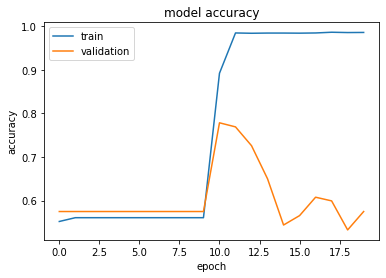

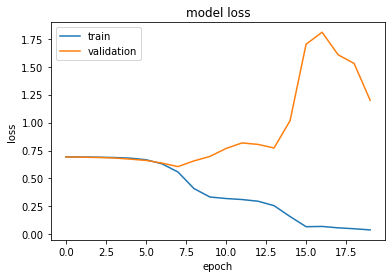

In [11]:
plt.subplots()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.subplots() # open a new plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()